# Simple Logistic Regression (classification)

This exercise demonstrates simple logistic regression with the following key steps:

- **Data Splitting** (Training and Testing Sets)
- **Simple Model Class** (Defining the Regression Model)
- **Training Loop** (Training the Model)
- **Graphing** (Visualizing Before-and-After Training and Losses)

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Data Generator

In [2]:
def data_generator():
    generator = torch.rand(1000, 2)
    data = generator[:, 0]
    label = ((generator[:,0]+0.3*generator[:,1]) > 0.5).to(torch.int)
    return data.float(), label.float()

In [3]:
torch.manual_seed(42)
input_data, output_data = data_generator()
input_data.size()

torch.Size([1000])

In [9]:
input_data

tensor([0.8823, 0.3829, 0.3904, 0.2566, 0.9408, 0.9346, 0.8694, 0.7411, 0.8854,
        0.2666, 0.2696, 0.2969, 0.1053, 0.3588, 0.5472, 0.9516, 0.8860, 0.3376,
        0.5779, 0.5547, 0.6343, 0.7104, 0.7890, 0.7886, 0.7539, 0.0050, 0.1165,
        0.6440, 0.6581, 0.8913, 0.5315, 0.6542, 0.6532, 0.9147, 0.2018, 0.9497,
        0.9811, 0.0041, 0.1637, 0.6790, 0.2418, 0.7653, 0.8035, 0.7860, 0.2477,
        0.6057, 0.7980, 0.1374, 0.9578, 0.3227, 0.2137, 0.4340, 0.5117, 0.0758,
        0.0624, 0.9998, 0.6541, 0.1716, 0.5782, 0.2846, 0.5014, 0.4654, 0.1568,
        0.3289, 0.9192, 0.9302, 0.0766, 0.3624, 0.0850, 0.6431, 0.6947, 0.8712,
        0.4137, 0.7581, 0.9555, 0.6258, 0.4452, 0.9554, 0.7672, 0.6625, 0.9545,
        0.5643, 0.7099, 0.2709, 0.6115, 0.2469, 0.7792, 0.2147, 0.1265, 0.8870,
        0.6161, 0.5907, 0.7610, 0.6870, 0.3676, 0.4117, 0.8196, 0.4505, 0.5073,
        0.6202, 0.0459, 0.9211, 0.4751, 0.1941, 0.3370, 0.8188, 0.0580, 0.4211,
        0.5723, 0.7069, 0.1764, 0.2726, 

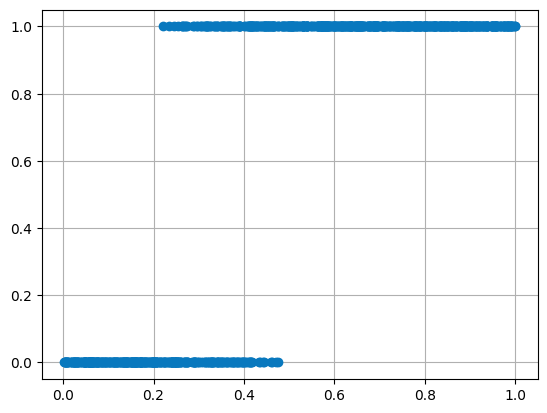

In [4]:
# Plot Color scheme
color1 = (8/255, 120/255, 190/255) # cool blue
color2 = (245/255, 150/255, 35/255) # warm orange
color3 = (34/255, 153/255, 84/255) # fresh green
color4 = (255/255, 182/255, 193/255) # Pastel pink
color5 = (180/255, 180/255, 180/255) # Light Grey

plt.plot(input_data, output_data, 'o', c=color1)
plt.grid(True)

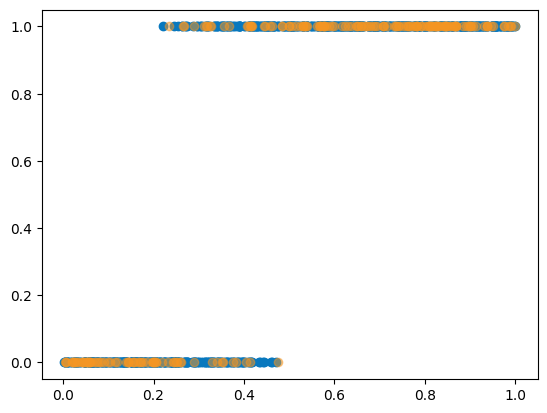

In [5]:
# Data solit
train_split = int(0.8 * len(input_data))

x_train = input_data[:train_split]
y_train = output_data[:train_split]

x_test = input_data[train_split:]
y_test = output_data[train_split:]

# Visualize after plitting
plt.plot(x_train, y_train, 'o', c=color1)
plt.plot(x_test, y_test, 'o', c=color2, alpha=0.5)

## Model Architecture

In [6]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(1, 1) # Mean 1 input and 1 output
        self.logist = nn.Sigmoid()
    def forward(self, x):
        out_0 = self.layer_1(x)
        out_1 = self.logist(out_0)
        return out_1

### Model initialization

In [7]:
model = LogReg() # Model initialization
loss_fn = nn.BCELoss() # For binary clasification
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Training Process

In [8]:
num_epoch = 100
train_losses = []
test_losses = []
for epoch in range(num_epoch):
    model.train() # Put model in train mode

    # Forward pass
    y_pred = model(x_train.view(-1, 1))

    # Calculate loss
    loss = loss_fn(y_pred, y_train.view(-1, 1))
    train_losses.append(loss.item())

    # Optimizer zero gradient
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer step
    optimizer.step()

    # TESTING
    model.eval()

    with torch.inference_mode():
        y_test_pred = model(x_test.view(-1, 1))
        test_loss = loss_fn(y_test_pred, y_test.view(-1, 1))
        test_losses.append(test_loss.item())

    # Print process
    print(f'Epoch: [{epoch+1}/{num_epoch}], Loss: {loss.item():.4f}')

Epoch: [1/100], Loss: 0.8741
Epoch: [2/100], Loss: 0.8581
Epoch: [3/100], Loss: 0.8429
Epoch: [4/100], Loss: 0.8285
Epoch: [5/100], Loss: 0.8148
Epoch: [6/100], Loss: 0.8019
Epoch: [7/100], Loss: 0.7898
Epoch: [8/100], Loss: 0.7782
Epoch: [9/100], Loss: 0.7673
Epoch: [10/100], Loss: 0.7571
Epoch: [11/100], Loss: 0.7473
Epoch: [12/100], Loss: 0.7382
Epoch: [13/100], Loss: 0.7295
Epoch: [14/100], Loss: 0.7213
Epoch: [15/100], Loss: 0.7136
Epoch: [16/100], Loss: 0.7063
Epoch: [17/100], Loss: 0.6994
Epoch: [18/100], Loss: 0.6929
Epoch: [19/100], Loss: 0.6867
Epoch: [20/100], Loss: 0.6809
Epoch: [21/100], Loss: 0.6754
Epoch: [22/100], Loss: 0.6701
Epoch: [23/100], Loss: 0.6652
Epoch: [24/100], Loss: 0.6605
Epoch: [25/100], Loss: 0.6561
Epoch: [26/100], Loss: 0.6519
Epoch: [27/100], Loss: 0.6479
Epoch: [28/100], Loss: 0.6441
Epoch: [29/100], Loss: 0.6405
Epoch: [30/100], Loss: 0.6371
Epoch: [31/100], Loss: 0.6338
Epoch: [32/100], Loss: 0.6307
Epoch: [33/100], Loss: 0.6277
Epoch: [34/100], Lo

## Results Visualization

### Training vs Losses

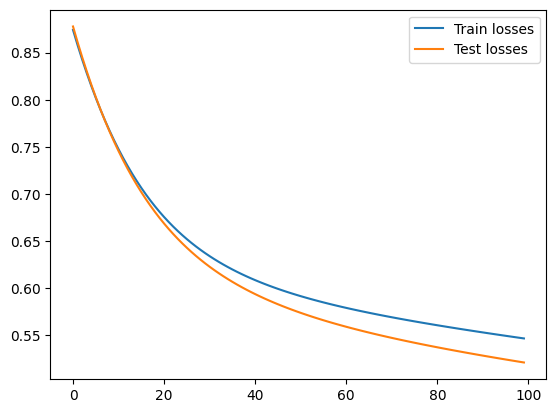

In [9]:
# Plot Train losses vs test losses
plt.plot(range(num_epoch), train_losses, label='Train losses')
plt.plot(range(num_epoch), test_losses, label='Test losses')
plt.legend()

### Post-Training Graph